In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/gapminder.tsv', sep='\t')

In [4]:
tuple(['Me', 'You'])

('Me', 'You')

In [5]:
# Series

# can do with anything

# tuple
s = pd.Series((1,2))
print(s)

# list
s = pd.Series([1,2,3])
print(s)

# works
s = pd.Series({'a': 1, 'b': 2}, index=tuple(['a', 'b']))
print(s)

# does not
s = pd.Series({'a': 1, 'b': 2}, index=tuple(['bb', 'b']))
print(s)

0    1
1    2
dtype: int64
0    1
1    2
2    3
dtype: int64
a    1
b    2
dtype: int64
bb    NaN
b     2.0
dtype: float64


In [16]:
# creating dataframe with index and columns
scientists = pd.DataFrame({
    'age': [20, 22],
    'occupation': ['Chemist', 'Statistician'],
    'born': ['1990-01-01', '1989-01-01']
}, index=['Matt', 'Rosie'], columns=['age', 'occupation', 'born'])

scientists

,age,occupation,born
Matt,20,Chemist,1990-01-01
Rosie,22,Statistician,1989-01-01


In [7]:
# name is the same as index?
scientists['occupation']


Matt          Chemist
Rosie    Statistician
Name: occupation, dtype: object

In [8]:
ages = scientists['age']
print(ages)
# pandas series is like an extension of numpy
type(ages)

print(ages.mean())
print(ages.min())
print(ages.max())
print(ages.std())
print(ages.quantile(0.1))

Matt     20
Rosie    22
Name: age, dtype: int64
21.0
20
22
1.4142135623730951
20.2


In [9]:
ages[ages < ages.mean()]




Matt    20
Name: age, dtype: int64

0.05043139570923757
0.06819988500933796
count    1000.000000
mean        0.050431
std         0.971175
min        -2.977595
25%        -0.642980
50%         0.068200
75%         0.698029
max         3.665095
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
Quantile 75%:
3      0.921007
7      1.218511
9      1.240855
10     0.948518
14     1.204057
         ...   
974    0.758258
975    1.287751
982    1.103842
983    1.268109
985    1.005386
Length: 250, dtype: float64
Quantile 90%:
95     2.344600
173    3.431569
332    2.628228
347    2.590281
443    2.456911
473    2.439910
475    2.977491
880    2.451425
919    3.665095
936    2.387491
dtype: float64


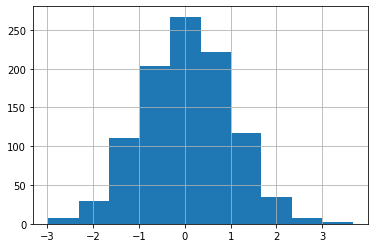

In [10]:
import matplotlib
from random import gauss
from random import seed
# seed(1)
white_noise = pd.Series([gauss(0.0, 1.0) for i in range(1000)])
print(white_noise.mean())
print(white_noise.quantile(0.5))
print(white_noise.describe())
# cool, plots histogram easily
print(white_noise.hist())
print('Quantile 75%:\n{}'.format(white_noise[white_noise > white_noise.quantile(0.75)]))
print('Quantile 90%:\n{}'.format(white_noise[white_noise > white_noise.quantile(0.99)]))




In [11]:
# we can perform operations over unequal size, will return nan
# we call this broadcast
print(ages + pd.Series([1,2,3], index=['Matt', 'Rosie', 'Jeff']))
print(ages.reset_index()['age'] + np.array([1,100]))


Jeff      NaN
Matt     21.0
Rosie    24.0
dtype: float64
0     21
1    122
Name: age, dtype: int64


In [12]:
# auto align
print(ages + ages)
# when indexed, it will auto align
print(ages.sort_index(ascending=False) + ages)


Matt     40
Rosie    44
Name: age, dtype: int64
Matt     40
Rosie    44
Name: age, dtype: int64


In [13]:
# broadcasting with different types
scientists * 2

,age,occupation
Matt,40,ChemistChemist
Rosie,44,StatisticianStatistician


In [22]:
# converting types
print(scientists['born'].dtype)
born_date_time = pd.to_datetime(scientists['born'], format='%Y-%m-%d')
print(born_date_time)
scientists['born_dt'] = born_date_time
print(scientists)

object
Matt    1990-01-01
Rosie   1989-01-01
Name: born, dtype: datetime64[ns]
       age    occupation        born    born_dt
Matt    20       Chemist  1990-01-01 1990-01-01
Rosie   22  Statistician  1989-01-01 1989-01-01


In [35]:
scientists['play'] = 0
# no effect, as we did operation over a copy
scientists[scientists['born'] >= '1990-01-01']['play'] =  1
print(scientists)
# effect, since we did the operation over a loc, a subset
scientists.loc[scientists['born'] >= '1990-01-01','play'] =  1
print(scientists)

age    occupation        born    born_dt  play
Matt    20       Chemist  1990-01-01 1990-01-01     0
Rosie   22  Statistician  1989-01-01 1989-01-01     0
       age    occupation        born    born_dt  play
Matt    20       Chemist  1990-01-01 1990-01-01     1
Rosie   22  Statistician  1989-01-01 1989-01-01     0


In [47]:
from datetime import datetime
# converting values
scientists['age_years_dt'] = pd.to_datetime(datetime.now()) - scientists['born_dt']
# here we have values raw
print(scientists)
scientists['age_years'] = scientists['age_years_dt'].astype('timedelta64[Y]')

print(scientists)
print(scientists['age_years'])


age    occupation        born    born_dt  play  \
Matt    20       Chemist  1990-01-01 1990-01-01     1   
Rosie   22  Statistician  1989-01-01 1989-01-01     0   

                    age_years_dt  age_years  
Matt  11013 days 23:23:49.207735       30.0  
Rosie 11378 days 23:23:49.207735       31.0  
       age    occupation        born    born_dt  play  \
Matt    20       Chemist  1990-01-01 1990-01-01     1   
Rosie   22  Statistician  1989-01-01 1989-01-01     0   

                    age_years_dt  age_years  
Matt  11013 days 23:23:49.207735       30.0  
Rosie 11378 days 23:23:49.207735       31.0  
Matt     30.0
Rosie    31.0
Name: age_years, dtype: float64


NameError: name 'timedelta64' is not defined

In [59]:
# dropping columns, axis = 1 means columns
# we define a name for index
scientists.index.name = 'name'
scientists
print(scientists.drop(['Matt'], axis=0))
print(scientists.drop(['age'], axis=1))

age    occupation        born    born_dt  play  \
name                                                    
Rosie   22  Statistician  1989-01-01 1989-01-01     0   

                    age_years_dt  age_years  
name                                         
Rosie 11378 days 23:23:49.207735       31.0  
         occupation        born    born_dt  play               age_years_dt  \
name                                                                          
Matt        Chemist  1990-01-01 1990-01-01     1 11013 days 23:23:49.207735   
Rosie  Statistician  1989-01-01 1989-01-01     0 11378 days 23:23:49.207735   

       age_years  
name              
Matt        30.0  
Rosie       31.0  
